
#### **Instructions**
1. Use Python 3.x to run this notebook
2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'.
you should not change anything else in the code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.
3. Read documentation of each function carefully.
4. All the Best!

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random

def set_seed(seed_value):
    # Set Python's built-in random seed
    random.seed(seed_value)

    # Set NumPy seed
    np.random.seed(seed_value)

    # Set PyTorch seed for CPU
    torch.manual_seed(seed_value)

    # If using GPU, set the seed for the GPU as well
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)  # For multi-GPU setups

    # Ensure that PyTorch uses deterministic algorithms (slower but reproducible)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    print(f"Seed set to {seed_value}")


##### VAE Encoder

In [5]:
set_seed(2024)
class VAEEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAEEncoder, self).__init__()

        # YOUR CODE STARTS HERE

        # Linear layer from input_dim to hidden_dim
        self.fc1 = nn.Linear(input_dim, hidden_dim)

        # Linear layer from hidden_dim to latent_dim
        self.fc2_mu = nn.Linear(hidden_dim, latent_dim)

        # Linear layer from hidden_dim to latent_dim
        self.fc2_log_var = nn.Linear(hidden_dim, latent_dim)

        # YOUR CODE ENDS HERE

    def forward(self, x):

        # YOUR CODE STARTS HERE

        # fc1 layer output (Apply relu on top of it)
        h = F.relu(self.fc1(x))

        # Compute mu
        mu = self.fc2_mu(h)

        # Compute log_var
        log_var = self.fc2_log_var(h)

        # YOUR CODE ENDS HERE

        return mu, log_var


    def reparameterize(self, mu, log_var):

        # YOUR CODE STARTS HERE
        # Compute standard deviation
        std = torch.exp(0.5 * log_var)

        # Compute eps using random normal distribution randn
        eps = torch.randn_like(std)

        # Compute z
        z = mu + eps * std

        return z
        # YOUR CODE ENDS HERE




# Sample input
input_dim = 28*28
hidden_dim = 256
latent_dim = 2
x = torch.randn((1, input_dim))

encoder = VAEEncoder(input_dim, hidden_dim, latent_dim)

# YOUR CODE STARTS HERE
mu, log_var = encoder(x)
z = encoder.reparameterize(mu, log_var)
# YOUR CODE ENDS HERE


print(f"mu: {mu}\nlog_var: {log_var}\nz: {z}")


Seed set to 2024
mu: tensor([[0.0751, 0.3391]], grad_fn=<AddmmBackward0>)
log_var: tensor([[0.1880, 0.0895]], grad_fn=<AddmmBackward0>)
z: tensor([[-1.1450,  1.5405]], grad_fn=<AddBackward0>)


**Q1. What is the value of z? (Select the closest option)** \\
a) z = [[-1.1450,  1.5405]] \\
b) z = [[-1.2653,  1.5955]] \\
c) z = [[-0.0293,  0.3905]] \\
d) z = [[-0.1337,  0.4419]] \\

##### VAE Decoder

In [6]:
set_seed(2024)
class VAEDecoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(VAEDecoder, self).__init__()
        # YOUR CODE STARTS HERE

        # Linear layer from laten_dim to hidden_dim
        self.fc1 = nn.Linear(latent_dim, hidden_dim)

        # Linear layer from hidden_dim to output_dim
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        # YOUR CODE ENDS HERE

    def forward(self, z):
        # YOUR CODE STARTS HERE

        # fc1 layer output (Use relu)
        h = F.relu(self.fc1(z))

        # fc2 layer output (Use an activation function that will ensure output is between 0 and 1)
        x_recon = torch.sigmoid(self.fc2(h))

        # YOUR CODE ENDS HERE
        return x_recon


decoder = VAEDecoder(latent_dim, hidden_dim, input_dim)
x_recon = decoder(z)

print(f"x_recon: {torch.mean(x_recon)}")


Seed set to 2024
x_recon: 0.4945041239261627


**Q2. What is the value of mean of x_recon? (Select the closest option)** \\
a) 0.1 \\
b) -0.1 \\
c) 0.5 \\
d) -0.5 \\

##### GAN Loss

In [7]:
set_seed(2024)

# Binary Cross Entropy Loss for GANs
adversarial_loss = nn.BCELoss()

# Discriminator loss for real and fake data
def discriminator_loss(real_preds, real_labels, fake_preds, fake_labels):

    # YOUR CODE STARTS HERE

    # Loss for real images
    real_loss = adversarial_loss(real_preds, real_labels)

    # Loss for fake images
    fake_loss = adversarial_loss(fake_preds, fake_labels)

    # Total loss
    total_loss = real_loss + fake_loss
    # YOUR CODE ENDS HERE

    return total_loss

# Generator loss
def generator_loss(fake_preds, real_labels):

    # YOUR CODE STARTS HERE

    # We want the generator to fool the discriminator, so use real_labels

    return adversarial_loss(fake_preds, real_labels)
    # YOUR CODE ENDS HERE

# Example usage:
batch_size = 64
# Sample input: Random predictions from the discriminator
real_preds = torch.rand(batch_size, 1)  # Predictions on real data
fake_preds = torch.rand(batch_size, 1)  # Predictions on fake data

# YOUR CODE STARTS HERE
# Real labels: 1 for real data, 0 for fake data
real_labels = torch.ones(batch_size, 1)
fake_labels = torch.zeros(batch_size, 1)

# Discriminator loss
d_loss = discriminator_loss(real_preds, real_labels, fake_preds, fake_labels)

# Generator loss
print(f"Discriminator Loss: {d_loss.item()}")

# Generator loss: we want the fake data to be classified as real (label=1)
g_loss = generator_loss(fake_preds, real_labels)
print(f"Generator Loss: {g_loss.item()}")
# YOUR CODE ENDS HERE


Seed set to 2024
Discriminator Loss: 1.784824013710022
Generator Loss: 1.0184342861175537


**Q3. Which of the following is true?** \\
a) Generator Loss = Discriminator loss \\
b) Generator loss < Discriminator loss \\
c) Generator loss > Discriminator loss \\

##### DDPM Schedule

Seed set to 2024


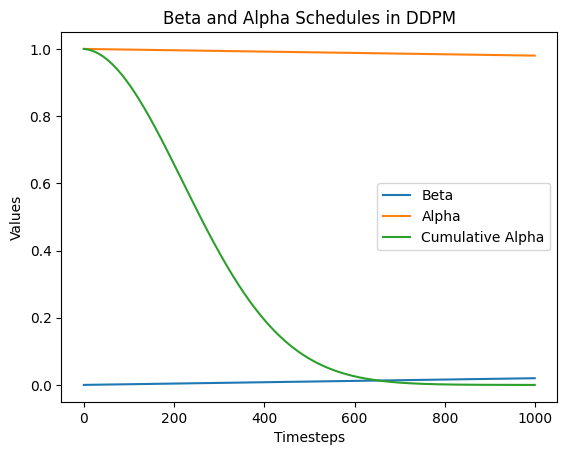

Beta[0]: 0.0001
Alpha[500]: 0.98994004004004
Alpha Cumulative Product at Timestep 999: 4.035829765375676e-05


In [8]:
set_seed(2024)
def linear_beta_schedule(timesteps, start=0.0001, end=0.02):
    """
    Linearly increases beta from `start` to `end` over `timesteps`.
    """

    # YOUR CODE STARTS HERE
    return np.linspace(start, end, timesteps)
    # YOUR CODE ENDS HERE

def calculate_alpha_schedule(betas):
    """
    Calculates the alpha schedule based on betas.
    """
    # YOUR CODE STARTS HERE
    alphas = 1.0 - betas
    alphas_cumprod = np.cumprod(alphas)
    # YOUR CODE ENDS HERE

    return alphas, alphas_cumprod



# Parameters
timesteps = 1000
betas = linear_beta_schedule(timesteps)
alphas, alphas_cumprod = calculate_alpha_schedule(betas)

# Plotting the results
plt.plot(range(timesteps), betas, label="Beta")
plt.plot(range(timesteps), alphas, label="Alpha")
plt.plot(range(timesteps), alphas_cumprod, label="Cumulative Alpha")
plt.legend()
plt.title("Beta and Alpha Schedules in DDPM")
plt.xlabel("Timesteps")
plt.ylabel("Values")
plt.show()

# Output some specific values for MCQ
print("Beta[0]:", betas[0])
print("Alpha[500]:", alphas[500])
print("Alpha Cumulative Product at Timestep 999:", alphas_cumprod[-1])


**Q4. What is the value of Alpha Cumulative Product at Timestep 999? (Select the closest value)** \\
a) 10^-1 \\
b) 10^-3 \\
c) 10^-5 \\
d) 10^-7 \\


##### DDPM Forward Process

Seed set to 2024


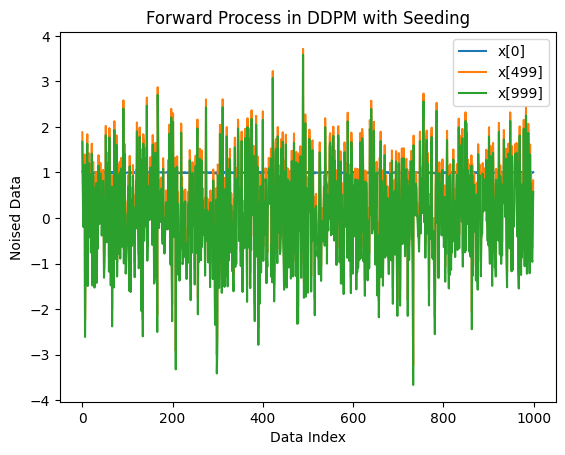

Beta[0]: 0.0001
Alpha[500]: 0.98994004004004
Alpha Cumulative Product at Timestep 999: 4.035829765375676e-05
x[0][500]: 0.9834769934073567
x[500][500]: -1.3030055532455247
x[999][500]: -1.640914474712557


In [9]:
set_seed(2024)


# Linear Beta Schedule Function
def linear_beta_schedule(timesteps, start=0.0001, end=0.02):
    """
    Linearly increases beta from `start` to `end` over `timesteps`.
    """
    # YOUR CODE STARTS HERE
    return np.linspace(start, end, timesteps)
    # YOUR CODE ENDS HERE

# Calculate Alpha Schedule
def calculate_alpha_schedule(betas):
    """
    Calculates the alpha schedule based on betas.
    """
    # YOUR CODE STARTS HERE
    alphas = 1.0 - betas
    alphas_cumprod = np.cumprod(alphas)
    # YOUR CODE ENDS HERE
    return alphas, alphas_cumprod


# Forward Process
def forward_process(x0, timesteps, betas, alphas_cumprod):
    """
    Simulates the forward process by adding noise to the input data `x0` over `timesteps`.
    x0: original data (e.g., an image or vector)
    timesteps: number of diffusion steps
    betas: beta schedule
    alphas_cumprod: cumulative product of alphas used for variance scheduling
    """
    noise = np.random.randn(*x0.shape)  # Random Gaussian noise
    xt = []  # To store x_t at each time step

    for t in range(timesteps):
        # YOUR CODE STARTS HERE
        mean = np.sqrt(alphas_cumprod[t]) * x0
        var = np.sqrt(1 - alphas_cumprod[t]) * noise
        xt.append(mean + var) # Apply noise progressively
        # YOUR CODE ENDS HERE

    return xt

# Parameters
timesteps = 1000
betas = linear_beta_schedule(timesteps)
alphas, alphas_cumprod = calculate_alpha_schedule(betas)

# Original data x0 (e.g., a 1D signal or image)
x0 = np.ones((1000,))  # Simplified as an array of ones for visualization

# Simulate the forward process
xt = forward_process(x0, timesteps, betas, alphas_cumprod)

# Plot x_t for a few time steps
plt.plot(xt[0], label="x[0]")
plt.plot(xt[499], label="x[499]")
plt.plot(xt[-1], label="x[999]")
plt.legend()
plt.title("Forward Process in DDPM with Seeding")
plt.xlabel("Data Index")
plt.ylabel("Noised Data")
plt.show()

# Output some specific values for MCQ
print("Beta[0]:", betas[0])
print("Alpha[500]:", alphas[500])
print("Alpha Cumulative Product at Timestep 999:", alphas_cumprod[-1])
print("x[0][500]:", xt[0][500])  # Value of x at index 500 for timestep 0
print("x[500][500]:", xt[500][500])  # Value of x at index 500 for timestep 0
print("x[999][500]:", xt[-1][500])  # Value of x at index 500 for timestep 999


**Q5. What is the value for x[999][500]?(Select the closest value)** \\
a) 1.5 \\
b) -1.5 \\
c) 2.5 \\
d) -2.5 \\


**Q6. What is the mean at last time step of Forward process?(Select the closest value)** \\
a) 0 \\
b) 0.25 \\
c) 0.5 \\
d) 1 \\